# Data Science Project Notebook

In [0]:
# Data wrangling libraries.
import pandas as pd
import numpy as np

In [0]:
# Other libraries
import math

In [0]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib.pyplot import cm

In [4]:
url_income = 'https://raw.githubusercontent.com/urehani1/491/master/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2007-2016.csv'
df_income = pd.read_csv(url_income)
print('File loaded')
display(df_income.head())

File loaded


,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,2018-08-02T00:00:00.000,2014,824,2380,2647,1798,2261,6251,2996,3125,...,4924,2223,1447,5287,2958,3891,4308,2953,2234,3253
1,2018-08-02T00:00:00.000,2010,833,2826,2311,1414,2006,5064,2965,3703,...,4582,2710,1609,5181,2747,5070,3948,3327,3097,3507
2,2018-08-02T00:00:00.000,2013,693,2773,2352,1071,1944,5241,3787,3280,...,3753,1836,1380,4946,3399,5169,5176,2999,3167,3420
3,2018-08-02T00:00:00.000,2011,760,2693,3430,1536,1728,4369,4213,3709,...,4603,2758,1911,6363,3426,2717,4929,2928,3582,4653
4,2018-08-02T00:00:00.000,2007,695,2604,1651,871,1042,5845,4311,4540,...,3934,2066,2240,3760,3244,4573,3963,3313,2961,4322


In [5]:
df_income=df_income.drop(columns=['Date created'])
df_income = df_income.drop(df_income[df_income.MARYLAND < 1000].index)
df_income.head(15)

,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,Cecil County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
6,2013,72482,39994,85685,41988,64624,91993,46015,82073,64880,...,55695,97873,71682,80143,36106,78274,57525,55643,47536,52276
7,2008,70482,39055,82616,40087,63078,82033,54934,78348,66131,...,52934,93895,71696,77686,39426,77703,62206,51587,48614,50347
11,2012,71169,38670,87083,39077,62413,87215,48772,79304,62443,...,49969,94365,69258,79012,34454,85478,61529,52604,50204,55875
12,2015,75784,39859,90825,43192,68317,98937,51294,84506,68972,...,52274,98314,76366,83914,38692,83148,62018,55270,52153,53366
13,2010,68933,37083,80908,38186,62300,86536,55480,80291,61506,...,49017,88559,69524,78503,38134,81559,56806,51610,47702,55492
14,2016,78787,44708,95297,46604,72305,97188,49616,89529,70504,...,54210,99604,78680,79966,38546,80049,62264,54643,50015,53509
15,2007,67989,37171,80158,36894,60828,89159,48387,79803,62489,...,46693,91440,67706,75902,35553,72534,56512,50257,49981,49067
16,2011,70075,38504,82980,38478,62309,88406,50809,82553,61191,...,49795,92288,70114,75158,35426,80943,55145,52028,45788,48472
17,2009,69193,37151,79843,38458,64629,86281,49050,78418,60543,...,50585,93774,69545,75146,35621,71316,59633,48883,46404,47829
18,2014,73851,39808,86654,41895,67766,92446,49573,84500,62198,...,53288,97279,71904,80650,38376,84686,54836,54606,51927,55691


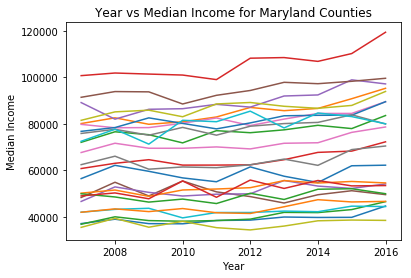

In [6]:
#counties = []
counties = list(df_income)
counties = counties[2:]
#print(counties)
color=iter(cm.rainbow(np.linspace(0,1,1)))
c=next(color)
for x in counties:
    x, y = zip(*sorted(zip(df_income['Year'], df_income[x])))
    plt.plot(x,y,label = 'dd')
plt.title('Year vs Median Income for Maryland Counties')
plt.xlabel('Year')
plt.ylabel('Median Income')
#plt.plot(x,y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df_income[['Year']]
df_pred_income = pd.DataFrame(columns=['County', 'Income_2017', 'Income_2018', 'Income_2019'])
for i in list(df_income.columns)[2:]:
  #print(type(i))
  y = df_income[[i]]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  income = regression_model.predict([[2017]])
  income2 = regression_model.predict([[2018]])
  income3 = regression_model.predict([[2019]])
  print(i,income[0][0],income2[0][0],income3[0][0])
  df_pred_income = df_pred_income.append({
      'County': i,
      'Income_2017': int(income[0][0]),
      'Income_2018': int(income2[0][0]),
      'Income_2019': int(income3[0][0])
  }, ignore_index=True)
  
 # new_row = pd.DataFrame({'Year':2017})
 

df_pred_income.head(5)  

#for i in list(df_income.columns)[2:]:
  #print(i)
#plt.scatter(x_train, y_train)
#plt.xlabel('Year')
#plt.ylabel('Income')
#plt.title('Training Set')
#plt.show()

Allegany County 42977.15384615399 43596.88461538474 44216.61538461549
Anne Arundel County 94512.95512820501 96174.01282051252 97835.0705128205
Baltimore City 45677.448717948515 46519.37179487175 47361.29487179476
Baltimore County 70712.2884615385 71679.34615384624 72646.40384615399
Calvert County 100630.85256410297 102595.7564102565 104560.66025641048
Caroline County 48427.29487179499 48055.487179487245 47683.679487179616
Carroll County 88581.55128205102 89783.62820512801 90985.70512820454
Cecil County 69838.2435897435 70731.858974359 71625.47435897426
Charles County 92053.02564102551 92826.564102564 93600.10256410227
Dorchester County 44229.66025641025 44386.525641025626 44543.39102564106
Frederick County 87755.8525641025 88784.25641025626 89812.66025641025
Garrett County 46885.24358974339 47421.35897435888 47957.47435897414
Harford County 81495.02564102551 82190.064102564 82885.10256410227
Howard County 116927.9615384615 118965.65384615399 121003.34615384601
Kent County 54127.4551282

,County,Income_2017,Income_2018,Income_2019
0,Allegany County,42977,43596,44216
1,Anne Arundel County,94512,96174,97835
2,Baltimore City,45677,46519,47361
3,Baltimore County,70712,71679,72646
4,Calvert County,100630,102595,104560


In [0]:
df_nces = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/ncesdata_md.csv')

In [0]:
df_fafsa = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/MD.csv')

In [10]:
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,Aberdeen High,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,Academy for College and Career Exploration,Baltimore City Public Schools,Baltimore city,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,Academy of Health Sciences at PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,Achievement Academy @ Harbor City High,Baltimore City Public Schools,Baltimore city,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,Albert Einstein High,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [11]:
df_fafsa.head()

,Name,City,State,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
0,ABERDEEN HIGH,ABERDEEN,MD,169,160,139,131,175,162,206,192
1,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,BALTIMORE,MD,49,42,45,42,47,46,53,50
2,ACADEMY OF HEALTH SCIENCES AT PGCC,LARGO,MD,82,79,78,77,78,78,82,80
3,ACADEMY OF THE HOLY CROSS,KENSINGTON,MD,91,91,80,77,83,81,84,82
4,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,BALTIMORE,MD,36,22,34,18,37,22,48,31


In [12]:
# Convert all the school names to uppercase.
df_nces['School Name'] = df_nces['School Name'].apply(lambda x: x.upper())
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,Baltimore City Public Schools,Baltimore city,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,ACADEMY OF HEALTH SCIENCES AT PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,Baltimore City Public Schools,Baltimore city,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,ALBERT EINSTEIN HIGH,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [13]:
df_joined = df_nces.merge(df_fafsa, left_on="School Name", right_on="Name")
df_joined = df_joined.merge(df_pred_income, left_on="County Name*", right_on="County")
df_joined.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018,County,Income_2017,Income_2018,Income_2019
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,139,131,175,162,206,192,Harford County,81495,82190,82885
1,240039000683,MD-12-120373,2400390,MD-12,9,12,BEL AIR HIGH,Harford County Public Schools,Harford County,100 Heighe St,...,202,195,220,214,252,245,Harford County,81495,82190,82885
2,240039001380,MD-12-120385,2400390,MD-12,9,12,C. MILTON WRIGHT HIGH,Harford County Public Schools,Harford County,1301 N Fountain Green Rd,...,223,211,241,231,257,249,Harford County,81495,82190,82885
3,240039000480,MD-12-120292,2400390,MD-12,7,12,CENTER FOR EDUCATIONAL OPPORTUNITY,Harford County Public Schools,Harford County,253 Paradise Rd,...,5,<5,5,<5,5,5,Harford County,81495,82190,82885
4,240039000690,MD-12-120176,2400390,MD-12,9,12,EDGEWOOD HIGH,Harford County Public Schools,Harford County,2415 Willoughby Beach Rd,...,153,129,166,136,194,166,Harford County,81495,82190,82885


In [14]:
df_joined.columns.tolist()

['NCES School ID',
 'State School ID',
 'NCES District ID',
 'State District ID',
 'Low Grade*',
 'High Grade*',
 'School Name',
 'District',
 'County Name*',
 'Street Address',
 'City_x',
 'State_x',
 'ZIP',
 'ZIP 4-digit',
 'Phone',
 'Locale Code*',
 'Locale*',
 'Charter',
 'Magnet*',
 'Title I School*',
 'Title 1 School Wide*',
 'Students*',
 'Teachers*',
 'Student Teacher Ratio*',
 'Free Lunch*',
 'Reduced Lunch*',
 'Name',
 'City_y',
 'State_y',
 'Applications_1920_Submitted_Apr19_2019',
 'Applications_1920_Complete_Apr19_2019',
 'Applications_1819_Submitted_Apr19_2018',
 'Applications_1819_Complete_Apr19_2018',
 'Applications_1819_Submitted_Jun_2018',
 'Applications_1819_Complete_Jun_2018',
 'Applications_1819_Submitted_Dec_2018',
 'Applications_1819_Complete_Dec_2018',
 'County',
 'Income_2017',
 'Income_2018',
 'Income_2019']

In [0]:
# Get rid of any <5 values in Applications by replacing it with 0.
df_joined['Applications_1920_Submitted_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Submitted_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1920_Complete_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Complete_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [0]:
df_joined['Students'] = pd.to_numeric(df_joined['Students*'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [0]:
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Applications_1920_Submitted_Apr19_2019']
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Applications_1819_Submitted_Apr19_2018']

In [0]:
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Students']

In [0]:
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Apr19_2018'] / df_joined['Students']

In [0]:
df_joined['City'] = df_joined['City_x']
df_joined['State'] = df_joined['State_x']
df_joined.drop('County Name*', axis=1, inplace=True)
df_joined.drop('City_x', axis=1, inplace=True)
df_joined.drop('City_y', axis=1, inplace=True)
df_joined.drop('State_x', axis=1, inplace=True)
df_joined.drop('State_y', axis=1, inplace=True)
df_joined.drop('Name', axis=1, inplace=True)

In [0]:
df_joined.rename(columns={
    'Low Grade*': 'Low_Grade',
    'High Grade*': 'High_Grade',
    'Locale Code*': 'Locale_Code',
    'Locale*': 'Locale',
    'Magnet*': 'Magnet',
    'Title I School*': 'Title_I_School',
    'Title 1 School Wide*': 'Title_1_School_Wide',
    'Students*': 'Students',
    'Teachers*': 'Teachers',
    'Student Teacher Ratio*': 'Student_Teacher_Ratio',
    'Free Lunch*': 'Free_Lunch',
    'Reduced Lunch*': 'Reduced_Lunch'
}, inplace=True)